In [0]:
##Author : Ria Thomas
##Master's in Computer Science with Big Data 
##Simon Fraser University, Burnaby
##Created on : March 18, 2020

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
l1 = pd.read_csv('/content/drive/My Drive/Lift1_train.csv')
l3 = pd.read_csv('/content/drive/My Drive/Lift3_train.csv')
l4 = pd.read_csv('/content/drive/My Drive/Lift4_train.csv')
l5 = pd.read_csv('/content/drive/My Drive/Lift5_train.csv')
l11 = pd.read_csv('/content/drive/My Drive/Lift11_train.csv')
l12 = pd.read_csv('/content/drive/My Drive/Lift12_train.csv')
l14 = pd.read_csv('/content/drive/My Drive/Lift14_train.csv')

In [0]:
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler(with_mean=True,with_std=True)
l1['value_scaled'] = scaler1.fit_transform(l1[['value']])

scaler3 = StandardScaler(with_mean=True,with_std=True)
l3['value_scaled'] = scaler3.fit_transform(l3[['value']])

scaler4 = StandardScaler(with_mean=True,with_std=True)
l4['value_scaled'] = scaler4.fit_transform(l4[['value']])

scaler5 = StandardScaler(with_mean=True,with_std=True)
l5['value_scaled'] = scaler5.fit_transform(l5[['value']])

scaler11 = StandardScaler(with_mean=True,with_std=True)
l11['value_scaled'] = scaler11.fit_transform(l11[['value']])

scaler12 = StandardScaler(with_mean=True,with_std=True)
l12['value_scaled'] = scaler12.fit_transform(l12[['value']])

scaler14 = StandardScaler(with_mean=True,with_std=True)
l14['value_scaled'] = scaler14.fit_transform(l14[['value']])

In [0]:
l1['movingAverage'] = l1['value_scaled'].rolling(3).mean()
l3['movingAverage'] = l3['value_scaled'].rolling(3).mean()
l4['movingAverage'] = l4['value_scaled'].rolling(3).mean()
l5['movingAverage'] = l5['value_scaled'].rolling(3).mean()
l11['movingAverage'] = l11['value_scaled'].rolling(3).mean()
l12['movingAverage'] = l12['value_scaled'].rolling(3).mean()
l14['movingAverage'] = l14['value_scaled'].rolling(3).mean()

In [0]:
temp_pandas = pd.concat([l1,l3,l4,l5,l11,l12,l14],axis=0)
temp_pandas.dropna(inplace=True)

In [0]:
temp_pandas.to_csv('Normal_patterns.csv')

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.,
        14000., 16000.]), <a list of 10 Text major ticklabel objects>)

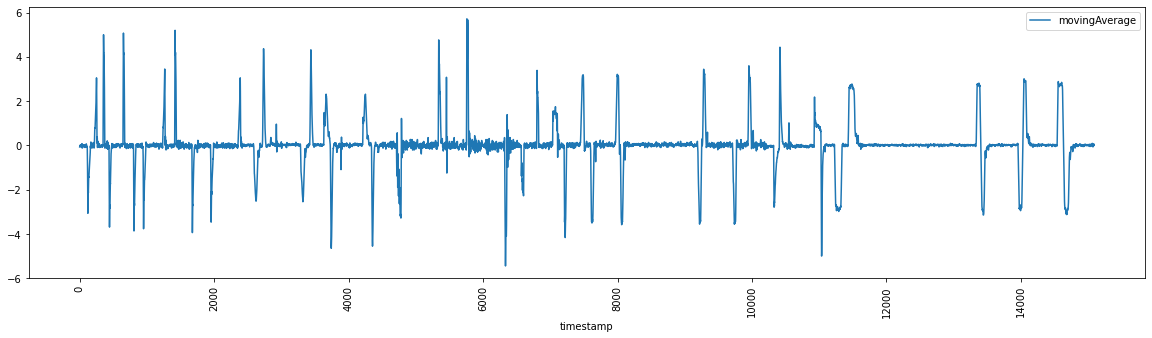

In [0]:
plt.rcParams["figure.figsize"] = (20,5)
temp_pandas.sort_values(by=['timestamp'],inplace=True)
temp_pandas.plot(x ='timestamp', y='movingAverage', kind = 'line')
plt.xticks(rotation=90)

In [0]:
temp_pandas = pd.read_csv('/content/drive/My Drive/Normal_train.csv')

In [0]:
train = temp_pandas[['timestamp','movingAverage']]

### Building the model

In [0]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [0]:
X_train, y_train = create_dataset(
  train[['movingAverage']],
  train.movingAverage,
  5
)

In [0]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [0]:
X_train.shape

(1422, 5, 1)

**Building the model**

In [0]:
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, LSTM, Dropout, TimeDistributed, Flatten, RepeatVector

In [0]:
model = Sequential()
model.add(LSTM(units=64,input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.2))
model.add(RepeatVector(n=X_train.shape[1]))
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(units=X_train.shape[2])))

In [0]:
model.compile(optimizer = 'adam', loss = 'mae')

In [0]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 64)                16896     
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_________________________________________________________________
repeat_vector_7 (RepeatVecto (None, 5, 64)             0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 5, 64)             33024     
_________________________________________________________________
dropout_15 (Dropout)         (None, 5, 64)             0         
_________________________________________________________________
time_distributed_7 (TimeDist (None, 5, 1)              65        
Total params: 49,985
Trainable params: 49,985
Non-trainable params: 0
__________________________________________________

In [0]:
history = model.fit(X_train,y_train,epochs = 25, batch_size = 32, validation_split = 0.1).history

Epoch 1/25
40/40 [==============================] - 1s 26ms/step - loss: 0.3053 - val_loss: 0.2606
Epoch 2/25
40/40 [==============================] - 0s 9ms/step - loss: 0.2342 - val_loss: 0.2187
Epoch 3/25
40/40 [==============================] - 0s 9ms/step - loss: 0.1992 - val_loss: 0.1955
Epoch 4/25
40/40 [==============================] - 0s 10ms/step - loss: 0.1838 - val_loss: 0.1900
Epoch 5/25
40/40 [==============================] - 0s 9ms/step - loss: 0.1698 - val_loss: 0.1766
Epoch 6/25
40/40 [==============================] - 0s 9ms/step - loss: 0.1566 - val_loss: 0.1550
Epoch 7/25
40/40 [==============================] - 0s 10ms/step - loss: 0.1440 - val_loss: 0.1385
Epoch 8/25
40/40 [==============================] - 0s 9ms/step - loss: 0.1344 - val_loss: 0.1424
Epoch 9/25
40/40 [==============================] - 0s 9ms/step - loss: 0.1324 - val_loss: 0.1341
Epoch 10/25
40/40 [==============================] - 0s 9ms/step - loss: 0.1290 - val_loss: 0.1143
Epoch 11/25
40/4

In [0]:
# Save the model
model_name = 'LSTM_weights_T3.h5'
model.save(model_name)
print('Saved trained model at %s ' % model_name)
model_json = model.to_json()
with open("LSTM_model_T3.json", "w") as json_file:
    json_file.write(model_json)

Saved trained model at LSTM_weights_T3.h5 


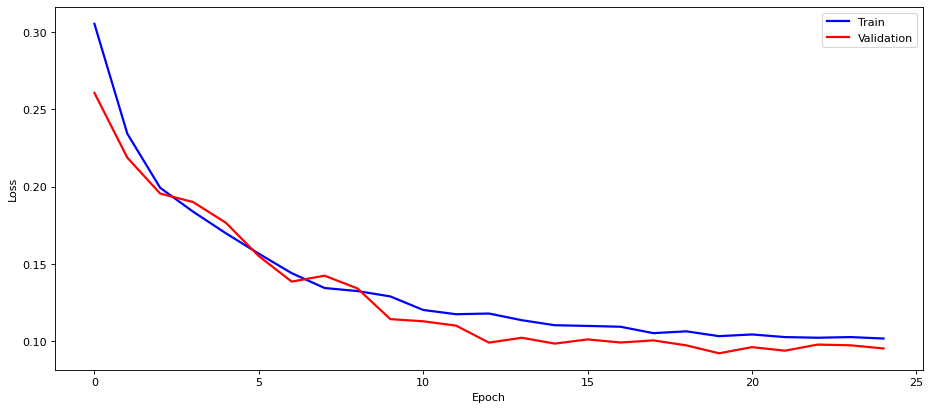

In [0]:
fig, ax = plt.subplots(figsize=(14,6), dpi=80)
ax.plot(history['loss'],'b',label='Train',linewidth=2)
ax.plot(history['val_loss'],'r',label='Validation',linewidth=2)
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend()
plt.show()


In [0]:
# Load the model
from tensorflow.python.keras.models import model_from_json
json_file = open('LSTM_model_T3.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("LSTM_weights_T3.h5")
print("Loaded model from disk")

Loaded model from disk


Predict the training data to find pattern of loss

In [0]:
import seaborn as sns

X_train_pred = model.predict(X_train)
train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

(0.0, 3.0)

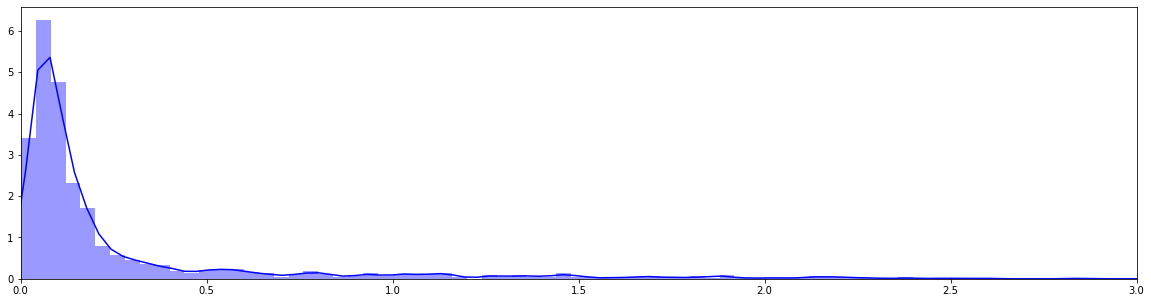

In [0]:
# Fins reconstruction error
sns.distplot(train_mae_loss,bins=100,kde=True,color='blue');
plt.xlim([0.0,3.0])

In [0]:
# Use 95th percentile
threshold = np.percentile(train_mae_loss, 95)
threshold

1.3338202437285336

In [0]:
# Selecting time range from 07/09 to 08/09 . Other data are useless
temp1 = spark.read.csv(input, schema=sens_schema)
temp1.createOrReplaceTempView("temp1")
temp1 = spark.sql("select timestamp,Z from temp1 where timestamp between '2018-07-09 06:42:00' and '2018-07-09 06:42:30'")


In [0]:
%time temp_pandas1 = temp1.select("*").toPandas()

CPU times: user 45.5 ms, sys: 8.98 ms, total: 54.4 ms
Wall time: 2min 42s


In [0]:
temp_pandas1.to_csv('Anomaly_sample_Lift1.csv',index=False)

In [0]:
# Z -normalization

unlist = udf(lambda x: round(float(list(x)[0]),6), types.DoubleType())
scaledData1 = scalerModel.transform(temp1).withColumn("Z_scaled", unlist("Z_scaled")).drop("Z_vector").cache()

In [0]:
# Select time ranges based on above analysis to extract that particular timeframe.
scaledData1.createOrReplaceTempView("scaledData1")
temp_df1 = spark.sql("select timestamp,Z,Z_scaled from scaledData1").cache()

In [0]:
# Conversion of timestamp string to timestamp type. This is for smoothing purpose
temp_df1 = temp_df1.withColumn("timestamp1", to_timestamp("timestamp", 'yyyy-MM-dd HH:mm:ss')).cache()

In [0]:
#Obtain moving averages
movAvg1 = temp_df1.withColumn("movingAverage", avg(temp_df1["Z_scaled"])
             .over( Window.partitionBy(temp_df1["timestamp1"]).rowsBetween(-3,3))).cache()

In [0]:
spark.conf.set("spark.sql.execution.arrow.enabled", "true")

In [0]:
%time temp_pandas1 = movAvg1.select("*").toPandas()

CPU times: user 59.2 ms, sys: 8.63 ms, total: 67.9 ms
Wall time: 3min 4s


In [0]:
temp_pandas1

,timestamp,Z,Z_scaled,timestamp1,movingAverage
0,2018-07-09 06:42:21.032,0.792969,0.227330,2018-07-09 06:42:21,0.113366
1,2018-07-09 06:42:21.072,0.792969,0.227330,2018-07-09 06:42:21,0.136158
2,2018-07-09 06:42:21.111,0.789063,0.075390,2018-07-09 06:42:21,0.100701
3,2018-07-09 06:42:21.150,0.785156,-0.076588,2018-07-09 06:42:21,0.075374
4,2018-07-09 06:42:21.190,0.792969,0.227330,2018-07-09 06:42:21,0.031957
...,...,...,...,...,...
755,2018-07-09 06:42:17.807,0.789063,0.075390,2018-07-09 06:42:17,-0.054866
756,2018-07-09 06:42:17.846,0.789063,0.075390,2018-07-09 06:42:17,-0.033160
757,2018-07-09 06:42:17.885,0.789063,0.075390,2018-07-09 06:42:17,-0.000599
758,2018-07-09 06:42:17.925,0.785156,-0.076588,2018-07-09 06:42:17,0.014599


(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,
         800.]), <a list of 10 Text major ticklabel objects>)

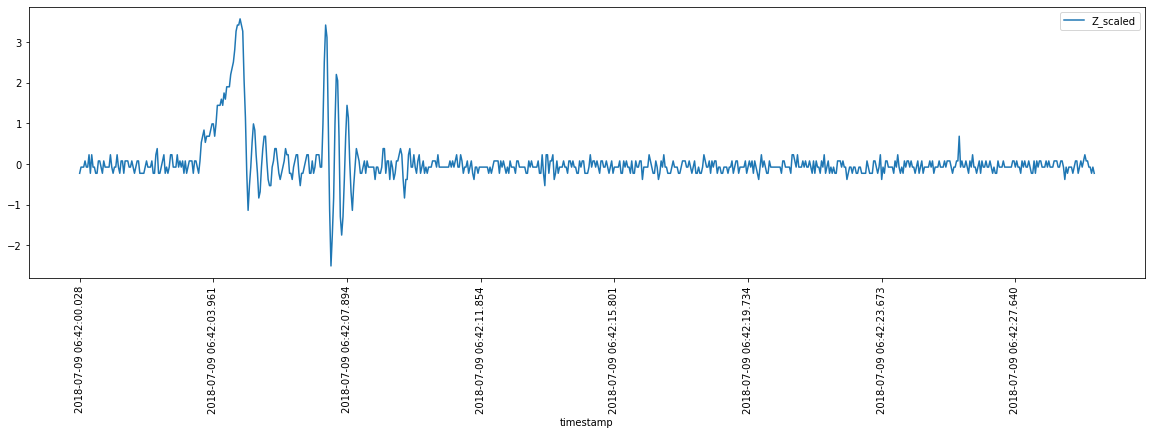

In [0]:
plt.rcParams["figure.figsize"] = (20,5)
temp_pandas1.sort_values(by=['timestamp'],inplace=True)
temp_pandas1.plot(x ='timestamp', y='Z_scaled', kind = 'line')
plt.xticks(rotation=90)

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,
         800.]), <a list of 10 Text major ticklabel objects>)

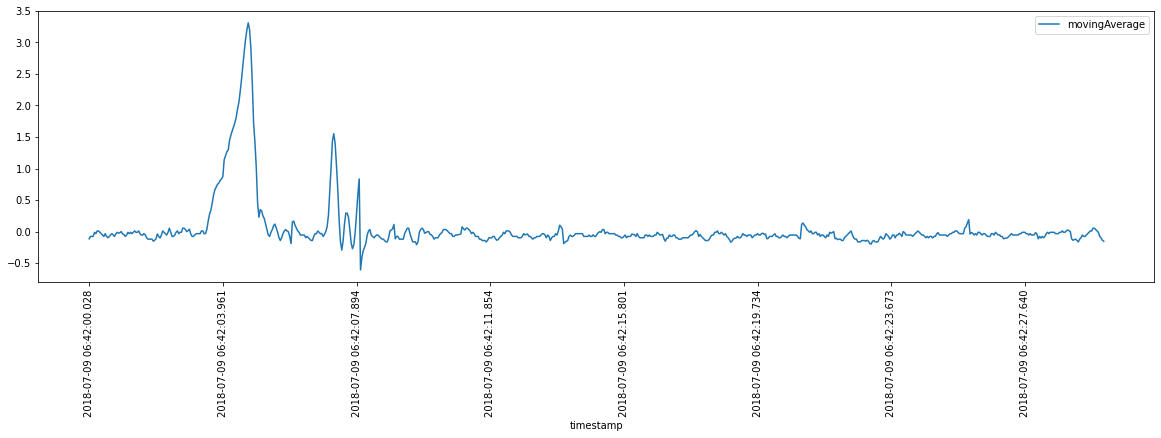

In [0]:
temp_pandas1.plot(x ='timestamp', y='movingAverage', kind = 'line')
plt.xticks(rotation=90)

In [0]:
test = temp_pandas1[['timestamp','movingAverage']]

In [0]:
X_test, y_test = create_dataset(
  test[['movingAverage']],
  test.movingAverage,
  50
)

In [0]:
X_test.shape

(710, 50, 1)

In [0]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [0]:
X_test_pred = model.predict(X_test)
test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis=1)

In [0]:
test_score_df = pd.DataFrame(index=test[50:].index)
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = threshold
test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold
test_score_df['movingAverage'] = test[50:].movingAverage

In [0]:
anomalies = test_score_df[test_score_df.anomaly == True]

In [0]:
anomalies.reset_index(inplace=True)

In [0]:
anomalies

,index,loss,threshold,anomaly,movingAverage
0,595,1.570824,1.5,True,2.224376
1,596,1.708576,1.5,True,2.419738
2,597,1.873567,1.5,True,2.636806
3,598,2.051585,1.5,True,2.853873
4,599,2.214028,1.5,True,3.049235
5,600,2.333968,1.5,True,3.201186
6,601,2.393965,1.5,True,3.309719
7,602,2.399042,1.5,True,3.201186
8,603,2.204365,1.5,True,2.897284
9,604,1.830657,1.5,True,2.376316


In [0]:
test.reset_index(inplace=True)

In [0]:
test_score_df.reset_index(inplace=True)

In [0]:
df_final = pd.merge(test,test_score_df,on='index')

No handles with labels found to put in legend.


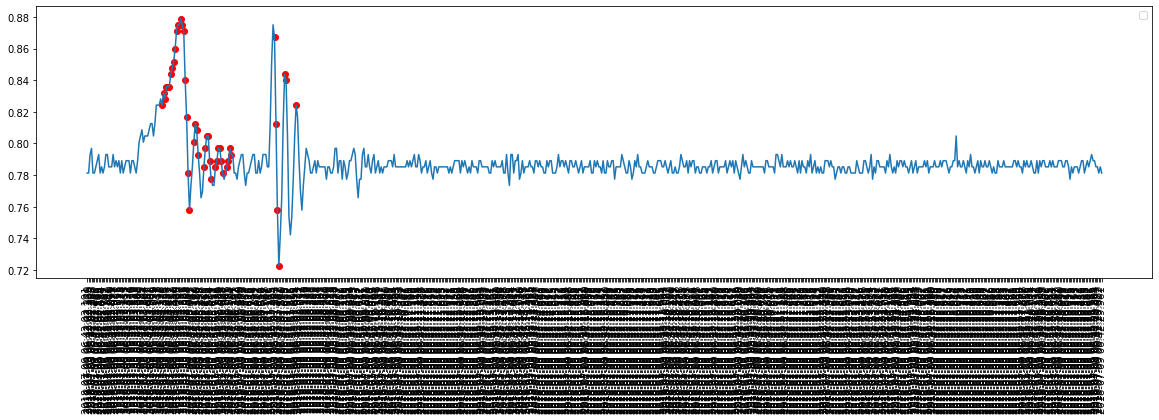

In [0]:
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(df_final['timestamp'],df_final['Z'],'-')
plt.scatter(df_final.timestamp[df_final.anomaly==1], df_final.Z[df_final.anomaly==1],marker='o',c='red')
plt.xticks(rotation = 90)
plt.legend();